In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [214]:
train_data=pd.read_csv('/Users/surajchoudhary/Documents/Kaggel/TitanicSurviver/train.csv')
test_data=pd.read_csv('/Users/surajchoudhary/Documents/Kaggel/TitanicSurviver/test.csv')

In [215]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [216]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [217]:
# Checking Missing values in train_data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [218]:
#Filling missing data
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

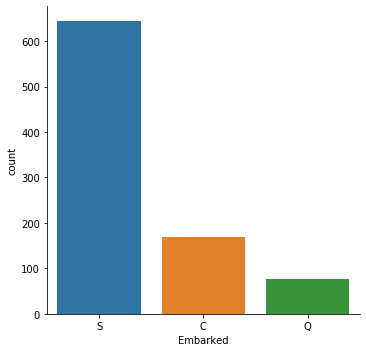

In [219]:
sns.catplot(x='Embarked',kind = 'count',data = train_data)

In [220]:
train_data['Embarked']=train_data['Embarked'].fillna('S')# Assigning S because most data belong to that.

In [221]:
group=train_data.groupby('Cabin')
group.count()
train_data['Cabin']=train_data['Cabin'].fillna('Missing')

In [222]:
# Checking Missing values in train_data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [223]:
#checking survival data

In [224]:
#By Gender
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [225]:
#By Passenger Class
train_data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [226]:
#By Embarked location
#The outward route was to be Southampton, England –> Cherbourg, France –> Queenstown, Ireland –> New York, USA
train_data[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [227]:
# Age Groups
#1: 0-5
#2: 6-18
#3: 18-30
#4: 31-45
#5: 45-60
#6: above 60    

train_data['Age']=train_data['Age'].astype(int) # Convert float to int
train_data.loc[(train_data['Age']<=5),'Age']=1
train_data.loc[(train_data['Age']>=6) & (train_data['Age']<=18),'Age']=2
train_data.loc[(train_data['Age']>=18) & (train_data['Age']<=30),'Age']=3
train_data.loc[(train_data['Age']>=31) & (train_data['Age']<=45),'Age']=4
train_data.loc[(train_data['Age']>=45) & (train_data['Age']<=60),'Age']=5
train_data.loc[(train_data['Age']>60),'Age']='6'

In [228]:
train_data[['Age','Survived']].groupby(['Age']).mean()

,Survived
Age,
1,0.704545
2,0.410526
3,0.329621
4,0.425743
5,0.417722
6,0.227273


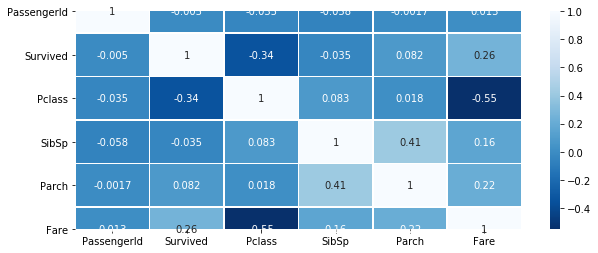

In [229]:
plt.subplots(figsize=(10,4))
sns.heatmap(train_data.corr(),annot=True,cmap='Blues_r',linewidths=.5)

In [230]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,4,0,0,373450,8.0500,Missing,S
5,6,0,3,"Moran, Mr. James",male,3,0,0,330877,8.4583,Missing,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,5,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,1,3,1,349909,21.0750,Missing,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3,0,2,347742,11.1333,Missing,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,2,1,0,237736,30.0708,Missing,C


In [231]:
#Assigning dummy values for categorical columns
train_data = pd.get_dummies(train_data, columns=["Sex"],drop_first=True)
train_data = pd.get_dummies(train_data, columns=["Embarked"],drop_first=True)

In [232]:
#Dropping columns that do not effect the outcome
train_data.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [244]:
#Make all changes to test_data that were made in train_data

In [248]:
#Filling missing data
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Embarked']=test_data['Embarked'].fillna('S')# Assigning S because most data belong to that.
test_data['Cabin']=test_data['Cabin'].fillna('Missing')
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [249]:
# Checking Missing values in test_data
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [250]:
#Grouping Age value for test_data

# Age Groups
#1: 0-5
#2: 6-18
#3: 18-30
#4: 31-45
#5: 45-60
#6: above 60    

test_data['Age']=test_data['Age'].astype(int) # Convert float to int
test_data.loc[(test_data['Age']<=5),'Age']=1
test_data.loc[(test_data['Age']>=6) & (test_data['Age']<=18),'Age']=2
test_data.loc[(test_data['Age']>=18) & (test_data['Age']<=30),'Age']=3
test_data.loc[(test_data['Age']>=31) & (test_data['Age']<=45),'Age']=4
test_data.loc[(test_data['Age']>=45) & (test_data['Age']<=60),'Age']=5
test_data.loc[(test_data['Age']>60),'Age']='6'

In [251]:
#Assigning dummy values for categorical columns
test_data = pd.get_dummies(test_data, columns=["Sex"],drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Embarked"],drop_first=True)

In [252]:
#Dropping columns that do not effect the outcome
test_data.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [253]:
#Applying K-Nearest Neighbor algorithm

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X = train_data.drop(['Survived'], axis=1) #Train on these columns
y = train_data["Survived"] #Predict this column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [256]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=2)

In [257]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [262]:
KNN_predict = KNN_model.predict(X_test)

In [263]:
KNN_score = KNN_model.score(X_test,y_test)
print("KNN Classifier Score :",KNN_score)

KNN Classifier Score : 0.6703910614525139


In [264]:
from sklearn import metrics

print("Accuracy Score of KNN Model:")
print(metrics.accuracy_score(y_test,KNN_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test,KNN_predict),'\n')

Accuracy Score of KNN Model:
0.6703910614525139

 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       110
           1       0.68      0.28      0.39        69

    accuracy                           0.67       179
   macro avg       0.67      0.60      0.58       179
weighted avg       0.67      0.67      0.63       179
 

